In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math as mt
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")


In [2]:
# reading CSV file
df=pd.read_csv("../data/arrhythmia.csv",header=None)


In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


### Data Preprocessing

In [4]:
df.shape

(452, 280)

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [6]:
#Counting total Number of null values

pd.isnull(df).sum().sum()

0

In [7]:
# replace ? with null values

df = df.replace('?', np.NaN)

In [8]:
# counting total number of null values again

pd.isnull(df).sum().sum()

408

In [9]:
# finding columns with null values 

df.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
275    0
276    0
277    0
278    0
279    0
Length: 280, dtype: int64

Text(0, 0.5, 'Total number of null value in each column')

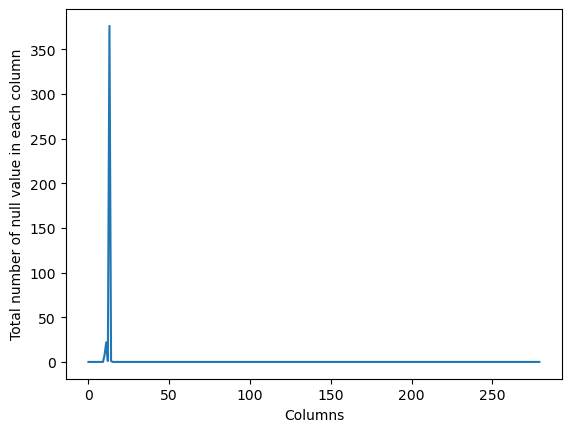

In [10]:
pd.isnull(df).sum().plot()
plt.xlabel('Columns')
plt.ylabel('Total number of null value in each column')

Text(0, 0.5, 'Total number of null value in each column')

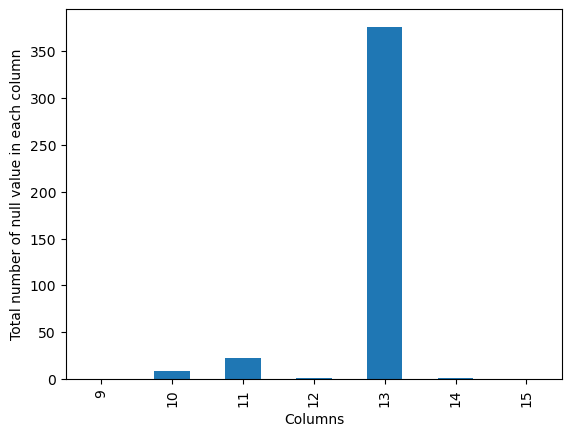

In [11]:
pd.isnull(df).sum()[9:16].plot(kind="bar")
plt.xlabel('Columns')
plt.ylabel('Total number of null value in each column')

In [12]:
# dropping the column 13 as it contains some many missing values.

df.drop(columns = 13, inplace=True)

##### Filling Missing Values

In [13]:
# make copy to avoid changing original data (when Imputing)

new_df = df.copy()

In [14]:
# make new columns indicating what will be imputed

cols_with_missing = (col for col in new_df.columns if new_df[col].isnull().any())
for col in cols_with_missing:
    new_df[col] = new_df[col].isnull()

In [15]:
# imputation 

imputer = SimpleImputer(missing_values=np.nan, strategy='mean') 
new_df = pd.DataFrame(imputer.fit_transform(new_df))
new_df.columns = df.columns

In [16]:
new_df[279] = new_df[279].astype(int)
new_df[1] = new_df[1].astype(int)
new_df[14] = new_df[14].astype(int)
new_df.head()


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75.0,0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56.0,1,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54.0,0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55.0,0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75.0,0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [17]:
new_df.isna().sum().sum()



0

##### Generating Final Dataset

In [18]:
#Adding column names

final_df_columns=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279", "class"]

In [19]:
#Adding Column names to dataset

new_df.columns=final_df_columns
new_df.to_csv("new_df_with_label.csv")
new_df.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
0,75.0,0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56.0,1,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54.0,0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55.0,0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75.0,0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [20]:
# removing the target attribute to create a final dataframe

final_df = new_df.drop(columns ="class")
target = new_df["class"]
final_df.to_csv("Final Dataset with dropped class Attribute.csv")
final_df.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6270,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279
0,75.0,0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,56.0,1,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,54.0,0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,55.0,0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,75.0,0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8


## Exploratory Data Analysis

In [21]:
# list with class names

class_names = {1 : "Normal", 
               2 : "Ischemic changes (CAD)", 
               3 : "Old Anterior Myocardial Infraction",
               4 : "Old Inferior Myocardial Infraction",
               5 : "Sinus tachycardy", 
               6 : "Sinus bradycardy", 
               7 : "Ventricular Premature Contraction (PVC)",
               8 : "Supraventricular Premature Contraction",
               9 : "Left Boundle branch block",
               10 : "Right boundle branch block",
               11 : "1.Degree AtrioVentricular block",
               12 : "2.Degree AV block",
               13 : "3.Degree AV block",
               14 : "Left Ventricule hypertrophy",
               15 : "Atrial Fibrillation or Flutter",
               16 : "Others"}

In [22]:
# Counting the number of instances for each class

new_df['class'].map(class_names).value_counts()

Normal                                     245
Right boundle branch block                  50
Ischemic changes (CAD)                      44
Sinus bradycardy                            25
Others                                      22
Old Anterior Myocardial Infraction          15
Old Inferior Myocardial Infraction          15
Sinus tachycardy                            13
Left Boundle branch block                    9
Atrial Fibrillation or Flutter               5
Left Ventricule hypertrophy                  4
Ventricular Premature Contraction (PVC)      3
Supraventricular Premature Contraction       2
Name: class, dtype: int64

In [23]:
# placing the value counts in a list
la = new_df.sort_values('class')['class'].map(class_names).value_counts(sort=False).tolist()
la


[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 4, 5, 22]

[44, 15, 15, 13, 25, 3, 2, 9, 50, 0, 0, 0, 4, 5, 22]


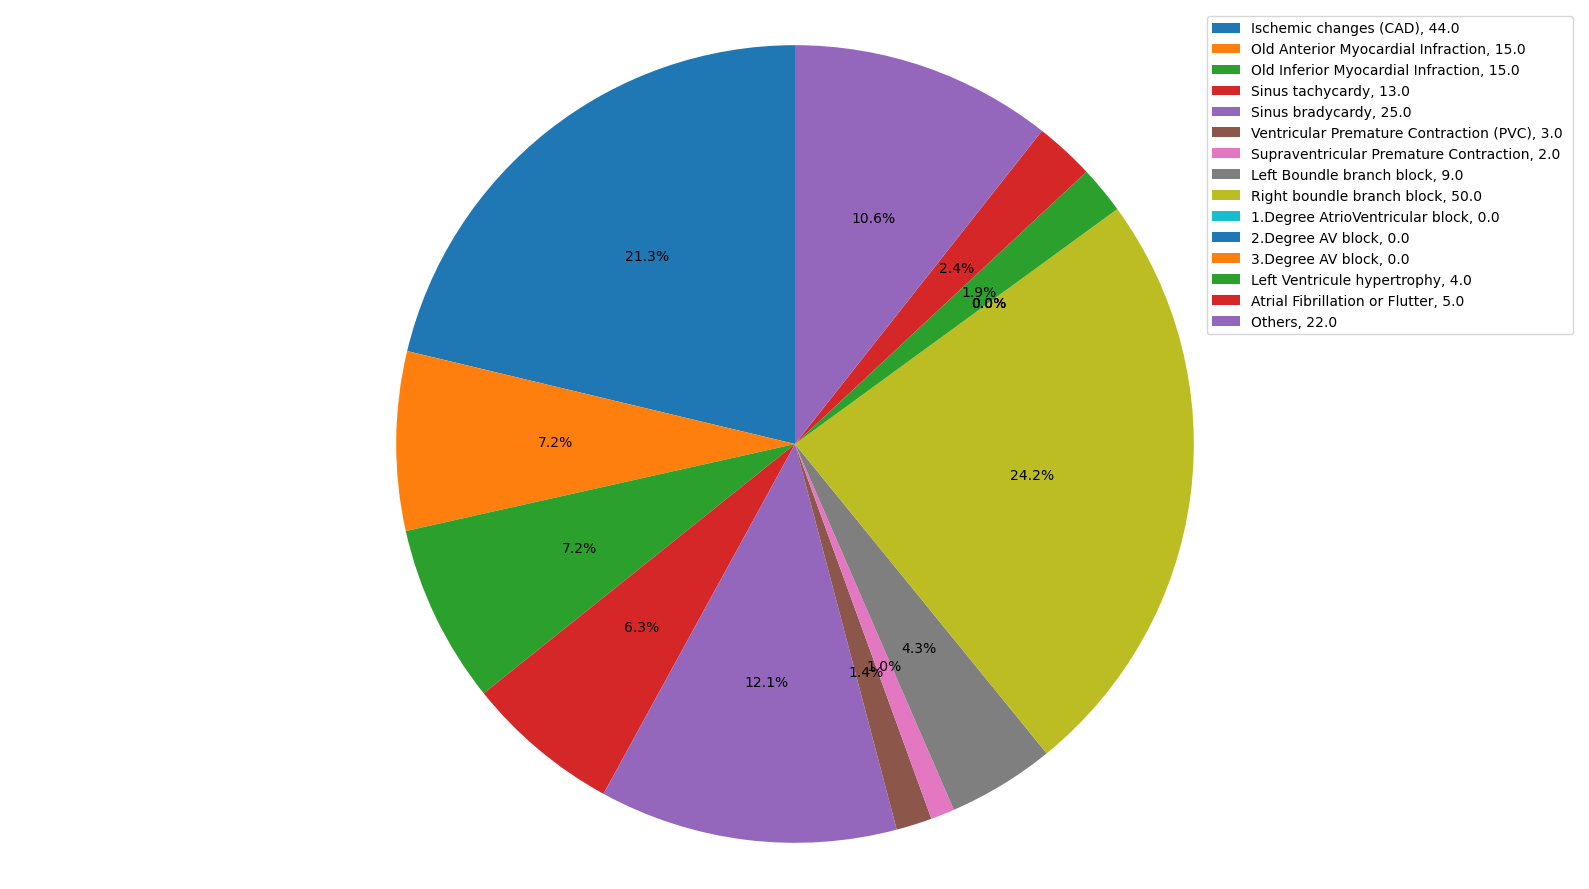

In [24]:
# Visualiation of Dataset With Respect to Class

# we remove the normal class from the visualizations,
# the normal class has the highest number of records 
# it does not add any additional value to the  visualization.

labels = list(class_names.values())[1:]
values = la[1:10]
values.extend([0,0,0])
values.extend(la[10:13])
print(values)
#we normalize the data with base 10 logarithm to be able to "plot them in a decent way"
# Log_Norm = []
# for i in values:
#     Log_Norm.append(mt.log10(i+1))
fig1, ax1 = plt.subplots(figsize=(16,9))
patches = plt.pie(values, autopct='%1.1f%%', startangle=90)

leg = plt.legend( loc = 'best', labels=['%s, %1.1f ' % (l, s) for l, s in zip(labels, values)])
plt.axis('equal')

for text in leg.get_texts():
    plt.setp(text, color = 'Black')
plt.tight_layout()
plt.show()

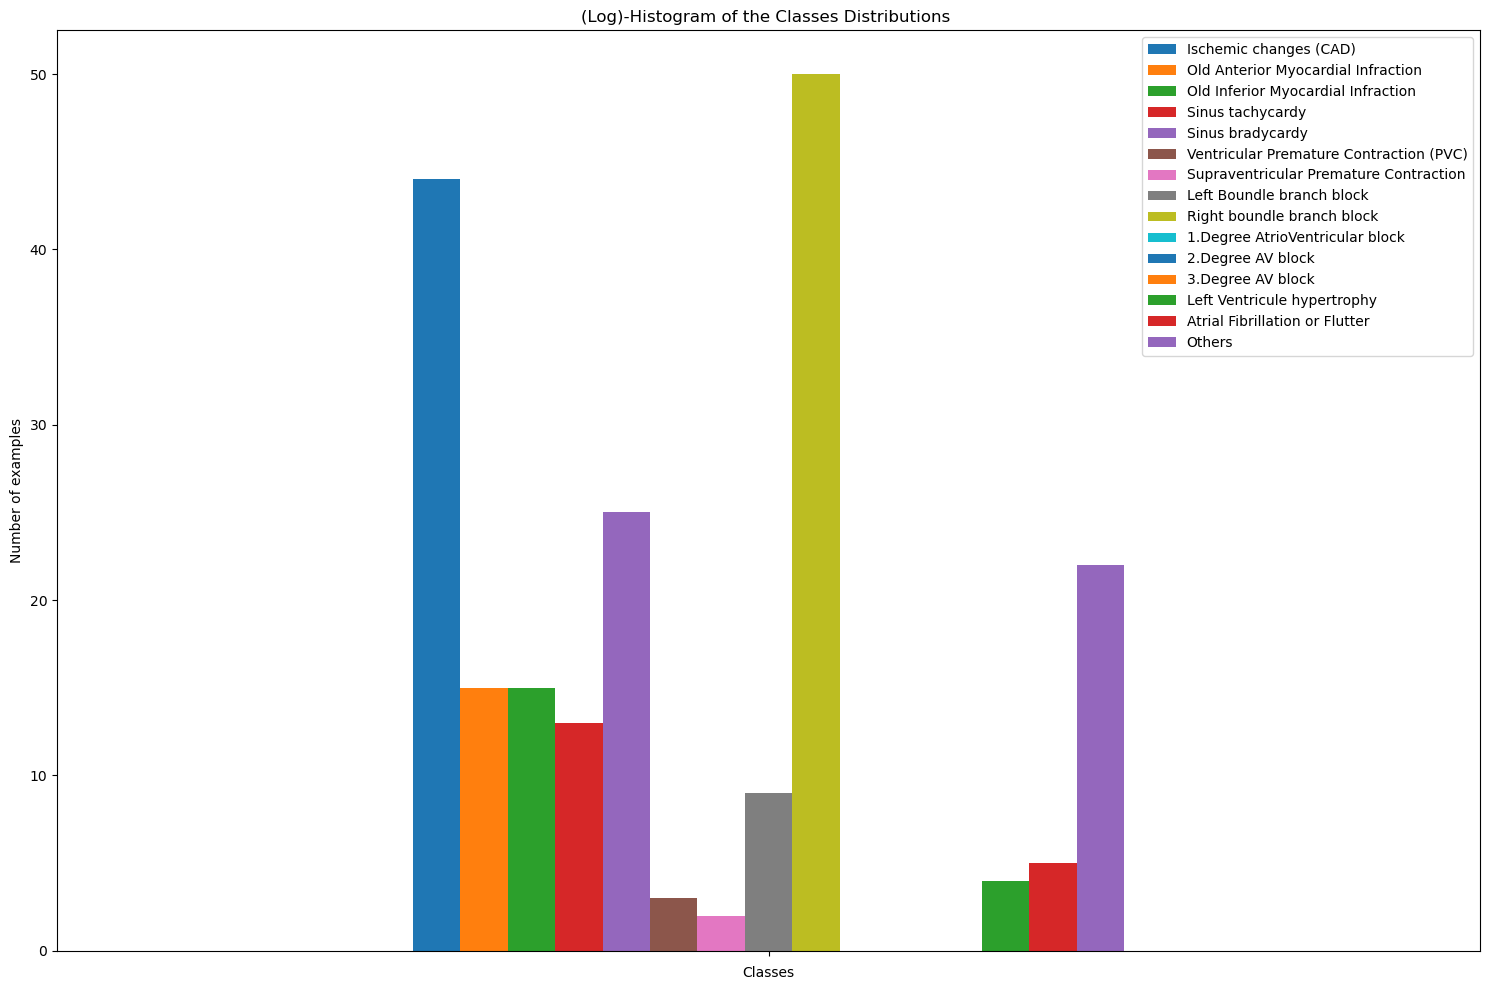

In [25]:
fdict = {}
j = 0
for i in labels:
    fdict[i] = values[j]
    j+=1
fdf = pd.DataFrame(fdict,index=[0])
fdf = fdf.rename(index={0: ''})
fig, ax = plt.subplots(figsize=(15,10))
fdf.plot(kind="bar",ax=ax)
ax.set_title("(Log)-Histogram of the Classes Distributions ")
ax.set_ylabel('Number of examples')
ax.set_xlabel('Classes')
fig.tight_layout()
plt.show()

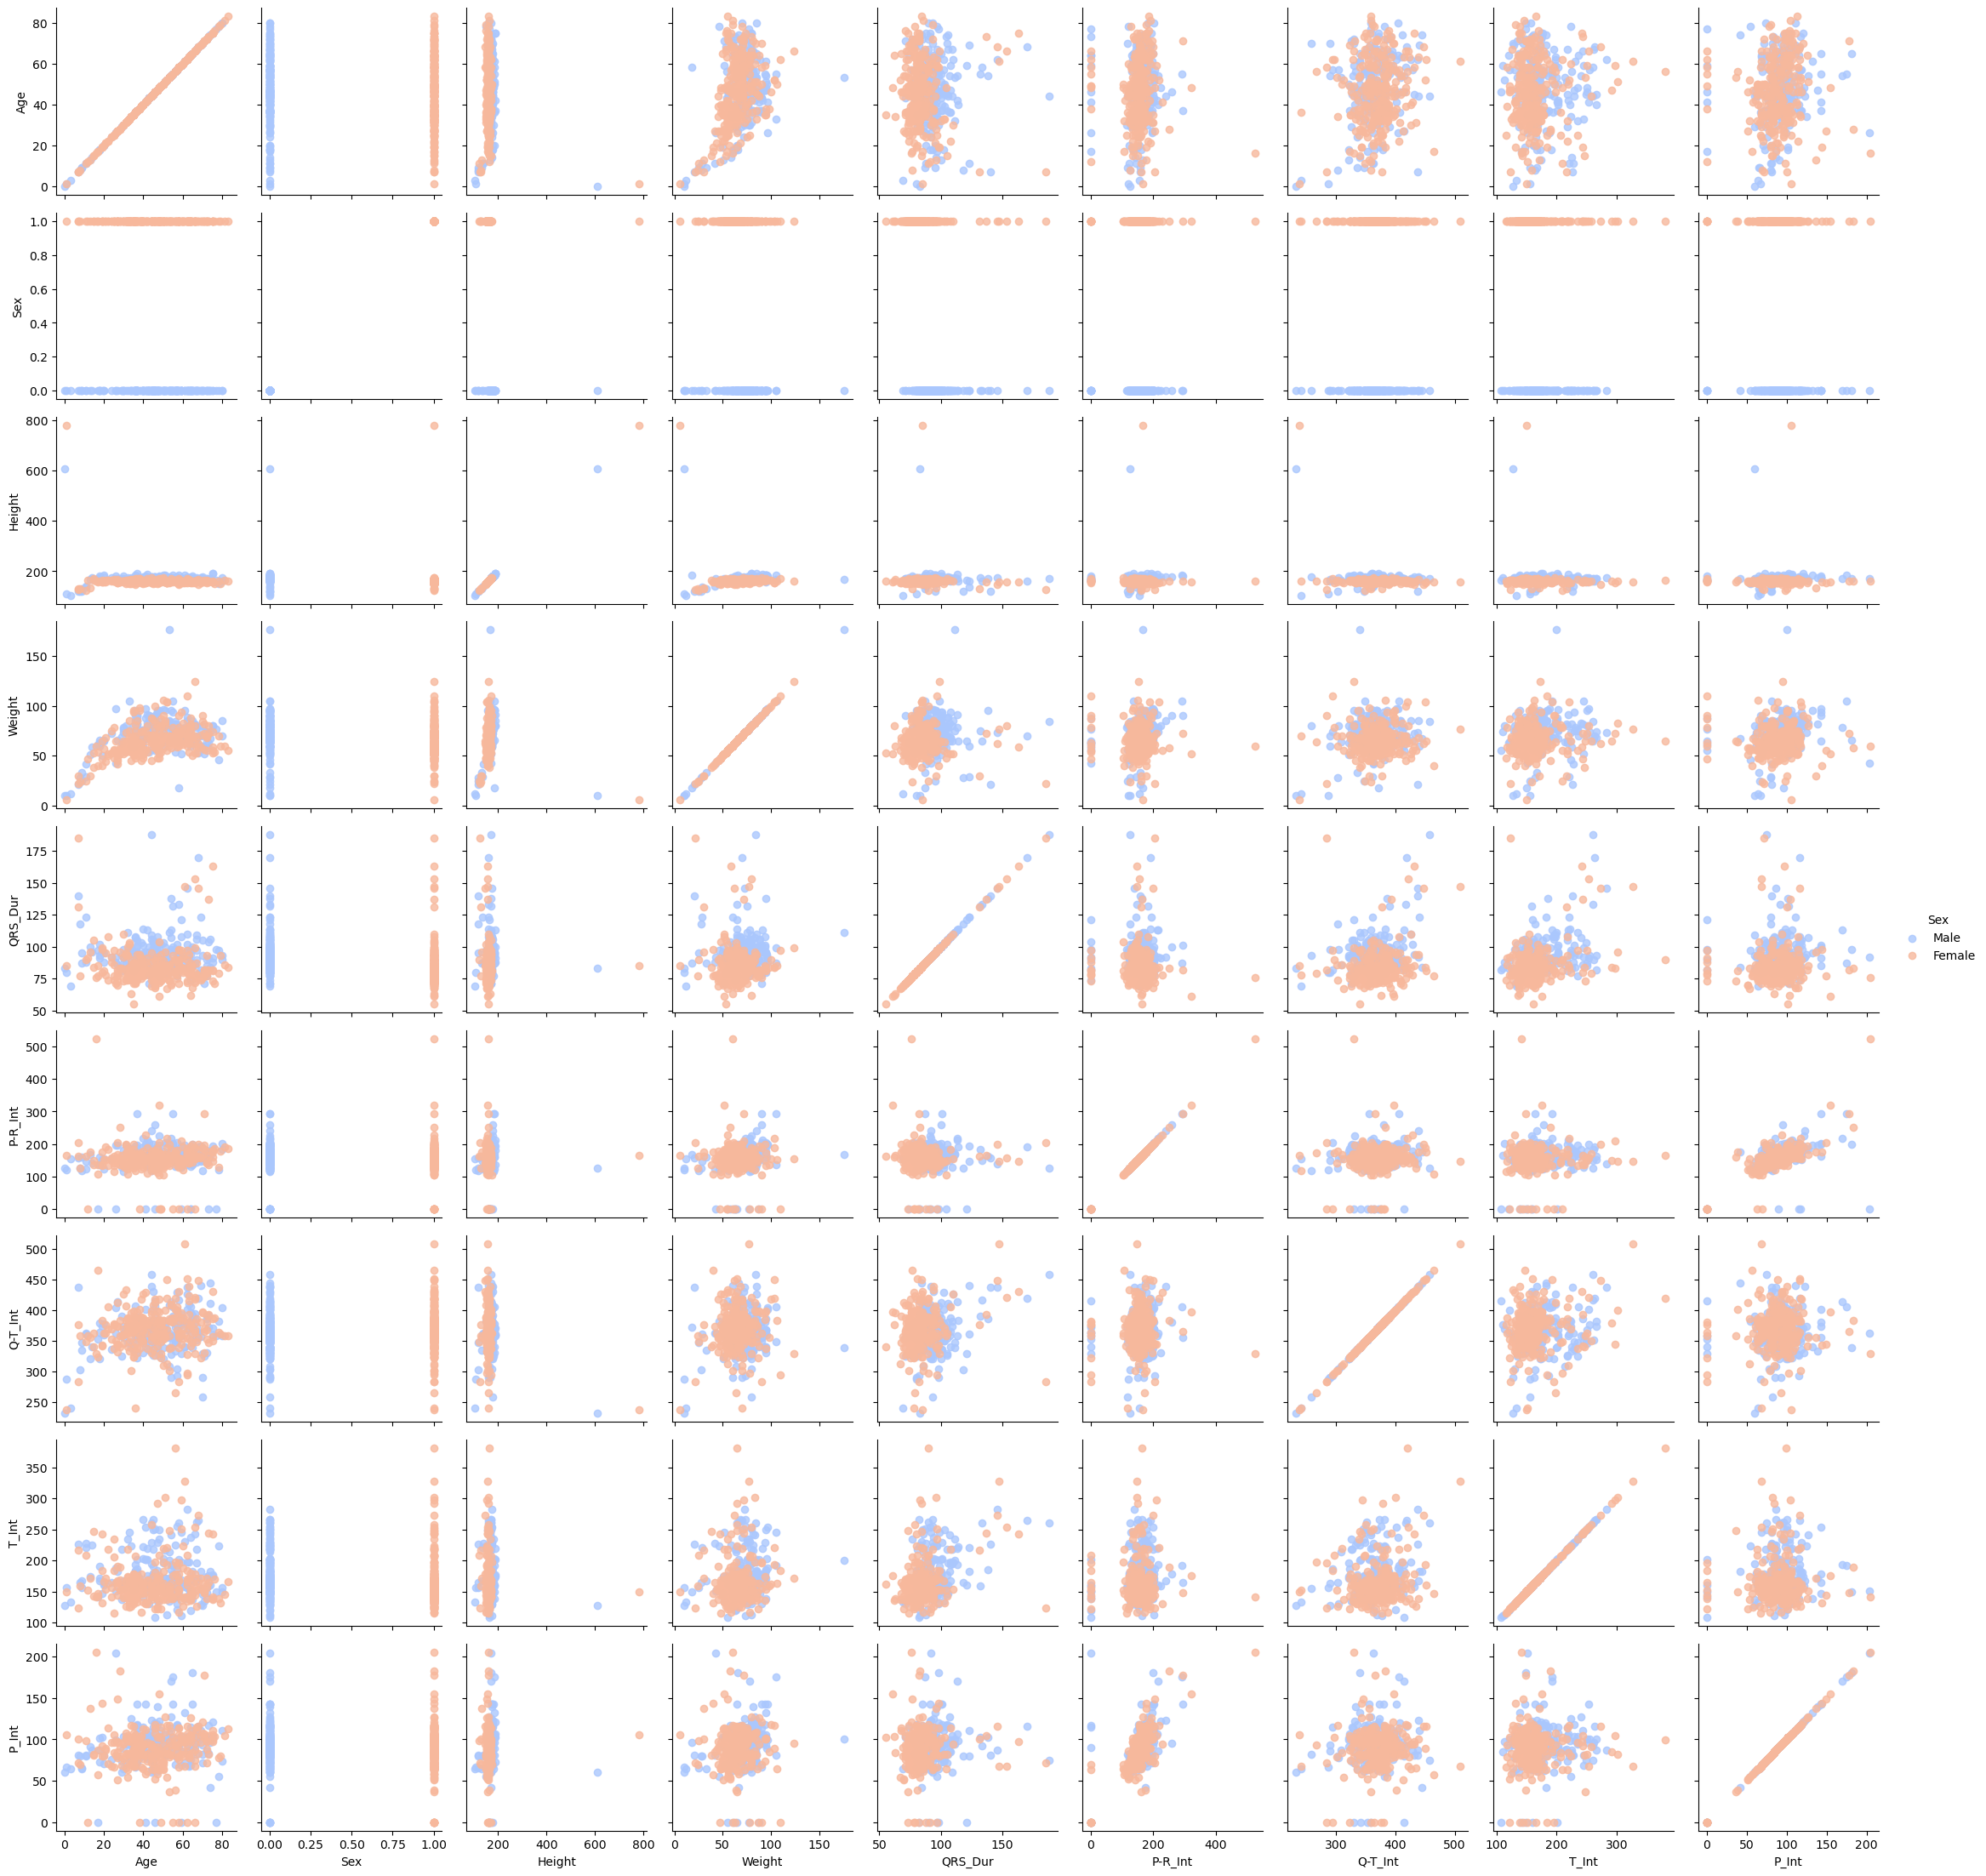

In [26]:
# pairwise relationships and outliers for age, sex, height, weight and heart rate

#looking for pairwise relationships and outliers

g = sns.PairGrid(final_df, vars=final_df.columns[:9],hue='Sex', palette='coolwarm')
g.map(plt.scatter, alpha=0.8)
g.add_legend(labels=['Male', 'Female']);

In [27]:
# Checking for outliers in height

sorted(final_df['Height'], reverse=True)[:10]


[780.0, 608.0, 190.0, 190.0, 190.0, 188.0, 186.0, 186.0, 186.0, 185.0]

In [28]:
# The tallest person ever lived in the world was 272 cm (1940).
# His followers were 267 cm(1905) and 263.5 cm(1969). 
# Replacing 780 and 608 with 180 and 108 cm respectively.

final_df['Height'] = final_df['Height'].replace(608,108)
final_df['Height'] = final_df['Height'].replace(780,180)


In [29]:

# checking for outliers in weight

sorted(final_df['Weight'], reverse=True)[:10]


[176.0, 124.0, 110.0, 106.0, 105.0, 105.0, 104.0, 104.0, 100.0, 98.0]

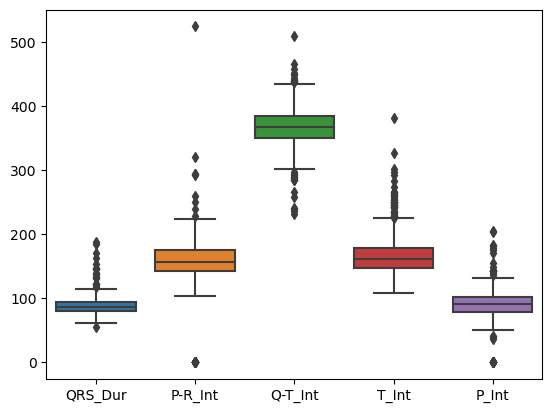

In [30]:
sns.boxplot(data=final_df[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]]);


In [31]:
# PR interval is the period, measured in milliseconds,
# that extends from the beginning of the P wave until the 
# beginning of the QRS complex; it is normally between 120 and 200ms in duration.

len([x for x in final_df['P-R_Int'] if x<120 or x>200])

55

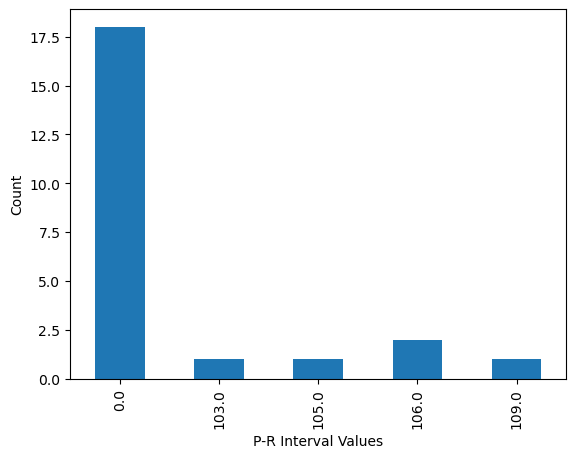

In [32]:
final_df['P-R_Int'].value_counts().sort_index().head().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

PR Interval data is including outliers 0(x18). we'll keep them


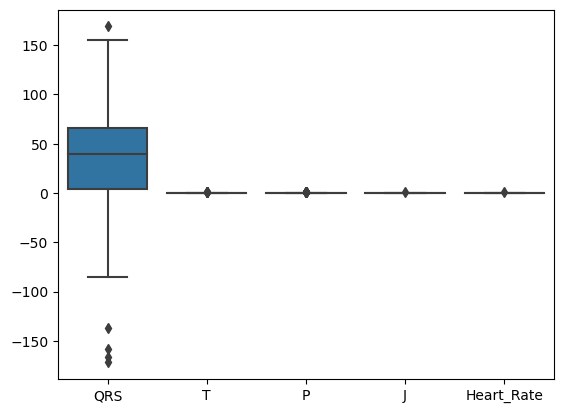

In [33]:
sns.boxplot(data=final_df[["QRS","T","P","J","Heart_Rate"]]);

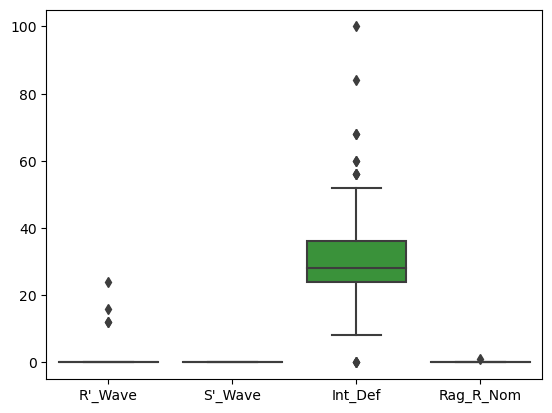

In [34]:
sns.boxplot(data=final_df[["R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]]);


S' Wave has 0's, which are not NaN. So, we can't assume them as outliers.

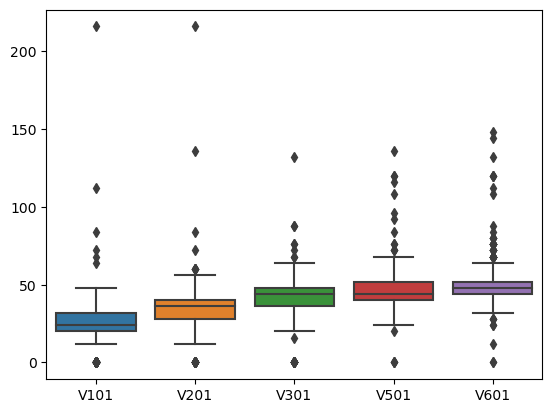

In [35]:
sns.boxplot(data=final_df[["V101","V201","V301","V501","V601"]]);

In [36]:
final_df["V101"].value_counts().sort_index(ascending=False)


216.0     1
112.0     1
84.0      1
72.0      1
68.0      1
64.0      1
48.0      6
44.0      6
40.0     13
36.0     36
32.0     63
28.0     81
24.0     88
20.0     57
16.0     13
12.0      4
0.0      79
Name: V101, dtype: int64

V101 has an outlier, but when we look at other sets (V201, V301, V501) we can see that there's an outlier similarly. Since the data is heavily biased, I can't say these outliers should be dropped.

For example, when we look at our data, we can see that class # 8 (Supraventricular Premature Contraction) has only 2 instances. Or # 3 (Ventricular Premature Contraction (PVC)) has only 3. The outliers appearing with our plots might belong to these instances and needs to be kept.

# Feature Scaling and Splitting dataset

We will be using 80% of our dataset for training purpose and 20% for testing purpose.

__Split Data__

In [37]:
from sklearn.model_selection import train_test_split

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(final_df, target ,test_size=0.2, random_state=1)

In [38]:
X_train.shape

(361, 278)

In [39]:
X_test.shape

(91, 278)

__Feature Scaling__

In [40]:
from sklearn.preprocessing import StandardScaler

numeric_columns=list(final_df.select_dtypes('float').columns)
categorical_columns=list(final_df.select_dtypes('int').columns)

# SCALING TRAINING DATA
# applying standard scalar for numeric data
numeric_data =  X_train[numeric_columns]
standard_scalar = StandardScaler()
normalized_numeric_data = standard_scalar.fit_transform(numeric_data)

# the categorical columns are already encoded.
categorical_data = X_train[categorical_columns]

X_train  = np.concatenate([normalized_numeric_data, categorical_data], axis=1)

# SCALING TEST DATA
# applying standard scalar for numeric data
numeric_data =  X_test[numeric_columns]
standard_scalar = StandardScaler()
normalized_numeric_data = standard_scalar.fit_transform(numeric_data)

# the categorical columns are already encoded.
categorical_data = X_test[categorical_columns]

X_test  = np.concatenate([normalized_numeric_data, categorical_data], axis=1)

# PCA

In [41]:
from sklearn.decomposition import PCA
pca = PCA(.98)
pca.fit(X_train)
pca.n_components_

121

In [42]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [43]:
X_train.shape

(361, 121)

# Modeling and Baseline Evaluation

In [44]:
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,recall_score,precision_score,confusion_matrix,classification_report
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from scikitplot.metrics import plot_confusion_matrix,plot_roc
from sklearn.metrics import roc_curve, roc_auc_score


In [45]:
# will store result of each model.

result = pd.DataFrame(columns=['Model','Train Accuracy', 'Test Accuracy'])

## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfclassifier = RandomForestClassifier(n_estimators=1000)

# fit the decision tree to the training data
rfclassifier.fit(X_train, y_train)

# predict class using test data
y_pred_rf = rfclassifier.predict(X_test)


In [48]:
# accuracy metrics and  confusion matrix
rf_test_accuracy = accuracy_score(y_test, y_pred_rf)
rf_train_accuracy = accuracy_score(y_train, rfclassifier.predict(X_train))
print(f'Test Accuracy score: {rf_test_accuracy}')
print(f'Train Accuracy score: {rf_train_accuracy}')

result = result.append(pd.Series({'Model':'Random Forest','Train Accuracy':rf_train_accuracy,'Test Accuracy':rf_test_accuracy}),ignore_index=True)

Test Accuracy score: 0.6923076923076923
Train Accuracy score: 1.0


In [49]:
# classification report 
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       0.65      1.00      0.79        52
           2       1.00      0.38      0.55         8
           3       0.00      0.00      0.00         4
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
           9       1.00      0.50      0.67         2
          10       1.00      0.60      0.75        10
          14       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         6

    accuracy                           0.69        91
   macro avg       0.42      0.32      0.34        91
weighted avg       0.60      0.69      0.61        91



## Support Vector Machines

In [52]:
from sklearn.svm import LinearSVC  
lsvmclassifier = LinearSVC(C=0.01)

# fit the decision tree to the training data
lsvmclassifier.fit(X_train, y_train)

# predict class using test data
y_pred_lsvm = lsvmclassifier.predict(X_test)


In [53]:
# accuracy metrics and  confusion matrix
lsvm_test_accuracy = accuracy_score(y_test, y_pred_lsvm)
lsvm_train_accuracy = accuracy_score(y_train, lsvmclassifier.predict(X_train))
print(f'Test Accuracy score: {lsvm_test_accuracy}')
print(f'Train Accuracy score: {lsvm_train_accuracy}')

result = result.append(pd.Series({'Model':'Support Vector Machines','Train Accuracy':lsvm_train_accuracy,'Test Accuracy':lsvm_test_accuracy}),ignore_index=True)


Test Accuracy score: 0.7912087912087912
Train Accuracy score: 0.8559556786703602


In [54]:
# classification report 
print(classification_report(y_test, y_pred_lsvm))

              precision    recall  f1-score   support

           1       0.79      0.92      0.85        52
           2       0.75      0.75      0.75         8
           3       1.00      1.00      1.00         4
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         2
           6       1.00      0.33      0.50         3
           7       0.00      0.00      0.00         1
           9       1.00      0.50      0.67         2
          10       0.83      1.00      0.91        10
          14       0.00      0.00      0.00         2
          16       0.50      0.17      0.25         6

    accuracy                           0.79        91
   macro avg       0.58      0.52      0.51        91
weighted avg       0.74      0.79      0.75        91



## Artificial Neural Networks 

In [55]:
from sklearn.neural_network import MLPClassifier  
nnclassifier = MLPClassifier(random_state=1)

# fit the neural network to the training data
nnclassifier.fit(X_train, y_train)

# predict class using test data
y_pred_nn = nnclassifier.predict(X_test)


In [56]:
# accuracy metrics and  confusion matrix
nn_test_accuracy = accuracy_score(y_test, y_pred_nn)
nn_train_accuracy = accuracy_score(y_train, nnclassifier.predict(X_train))
print(f'Test Accuracy score: {nn_test_accuracy}')
print(f'Train Accuracy score: {nn_train_accuracy}')

result = result.append(pd.Series({'Model':'Neural Networks','Train Accuracy':nn_train_accuracy,'Test Accuracy':nn_test_accuracy}),ignore_index=True)


Test Accuracy score: 0.7252747252747253
Train Accuracy score: 1.0


In [57]:
# classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.79      0.92      0.85        52
           2       0.75      0.75      0.75         8
           3       1.00      1.00      1.00         4
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         2
           6       1.00      0.33      0.50         3
           7       0.00      0.00      0.00         1
           9       1.00      0.50      0.67         2
          10       0.83      1.00      0.91        10
          14       0.00      0.00      0.00         2
          16       0.50      0.17      0.25         6

    accuracy                           0.79        91
   macro avg       0.58      0.52      0.51        91
weighted avg       0.74      0.79      0.75        91



In [58]:
# Baseline Evaluation
result

,Model,Train Accuracy,Test Accuracy
0,Random Forest,1.000000,0.692308
1,Support Vector Machines,0.855956,0.791209
2,Neural Networks,1.000000,0.725275


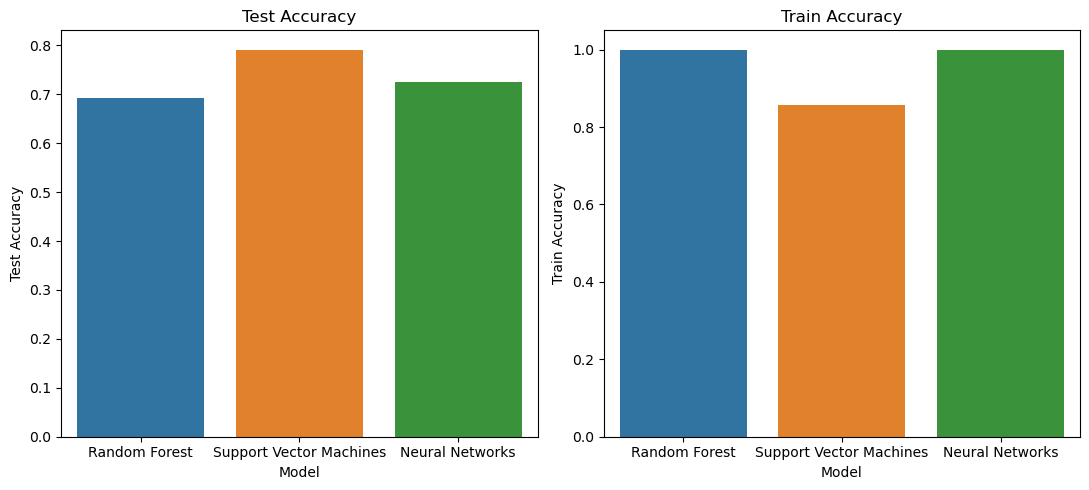

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5))

# Plot the first barplot on the left subplot
sns.barplot(data=result, x='Model', y='Test Accuracy', ax=axes[0])
axes[0].set_title('Test Accuracy')

# Plot the second barplot on the right subplot
sns.barplot(data=result, x='Model', y='Train Accuracy', ax=axes[1])
axes[1].set_title('Train Accuracy')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Hyperparameter Tuning

In [60]:
result_tuned = pd.DataFrame(columns=['Model','Accuracy', 'Recall', 'Precision', 'F-1 Score'])

## Random Forest

In [61]:
# hyper parameter tuning using GridSearchCV for Decision Tree
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV

rfclassifier = RandomForestClassifier()

parameters = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'criterion': ['gini', 'entropy'],  # Criterion for splitting
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'n_jobs': [8]  # Number of jobs to run in parallel for both fit and predict
}

scoring = {'accuracy': make_scorer(accuracy_score),
           'recall': make_scorer(recall_score, average='weighted'),
           'f1_score': make_scorer(f1_score, average='weighted')}

optimized_model = GridSearchCV(rfclassifier, parameters, cv=5, n_jobs=8, scoring=scoring, refit='accuracy', return_train_score=True)
optimized_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=8,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300], 'n_jobs': [8]},
             refit='accuracy', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score, average=weighted),
                      'recall': make_scorer(recall_score, average=weighted)})

In [62]:
from tabulate import tabulate

results = pd.DataFrame(optimized_model.cv_results_)
results[['params','mean_test_accuracy', 'mean_test_recall', 'mean_test_f1_score']].sort_values(by=['mean_test_recall', 'mean_test_accuracy'],ascending=False).head()


,params,mean_test_accuracy,mean_test_recall,mean_test_f1_score
16,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.584513,0.584513,0.466326
71,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.584475,0.584475,0.467475
17,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.581773,0.581773,0.462789
63,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.581773,0.581773,0.459057
66,"{'criterion': 'gini', 'max_depth': 20, 'max_fe...",0.581659,0.581659,0.460902


In [63]:
optimized_model.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 10,
 'n_estimators': 200,
 'n_jobs': 8}

In [64]:
# Applying the tuned hyper parameters
rfclassifier_tuned = RandomForestClassifier(criterion='gini', max_depth = None, max_features='sqrt', min_samples_split=5, n_estimators=200, n_jobs= 6)
rfclassifier.fit(X_train, y_train)
y_pred = rfclassifier.predict(X_test)
rf_tuned_accuracy = accuracy_score(y_test, y_pred)
rf_tuned_recall = recall_score(y_test, y_pred, average='weighted')
rf_tuned_precision = precision_score(y_test, y_pred, average='weighted')
rf_f1_score = f1_score(y_test, y_pred, average='weighted')

result_tuned = result_tuned.append(pd.Series({'Model':'Random Forest',
                                              'Accuracy':rf_tuned_accuracy,
                                              'Recall':rf_tuned_recall, 
                                              'Precision': rf_tuned_precision,
                                              'F-1 Score': rf_f1_score}),
                                              ignore_index=True)

              precision    recall  f1-score   support

           1       0.66      1.00      0.79        52
           2       1.00      0.50      0.67         8
           3       0.00      0.00      0.00         4
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
           9       1.00      0.50      0.67         2
          10       0.83      0.50      0.62        10
          14       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         6

    accuracy                           0.69        91
   macro avg       0.41      0.32      0.34        91
weighted avg       0.59      0.69      0.61        91



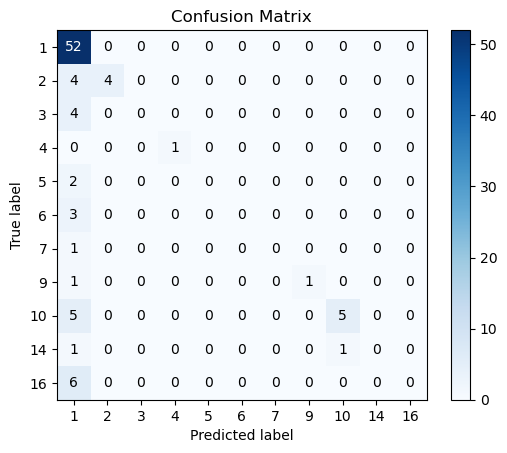

In [65]:
plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

## Support Vector Machines 

In [66]:
# hyper parameter tuning using GridSearchCV for support vector machines

from sklearn.model_selection import GridSearchCV

lsvmclassifier = LinearSVC()

parameters = param_grid_svc = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'intercept_scaling': [1, 2],  # Scaling of the intercept
    'loss': ['hinge', 'squared_hinge'],  # Specifies the loss function
    'max_iter': [1000, 2000],  # Maximum number of iterations
    'penalty': ['l1', 'l2'],  # Penalty term
    'tol': [1e-3, 1e-4],  # Tolerance for stopping criteria
}

scoring = {'accuracy': make_scorer(accuracy_score),
           'recall': make_scorer(recall_score, average='weighted'),
           'f1_score': make_scorer(f1_score, average='weighted')}

optimized_model = GridSearchCV(lsvmclassifier, parameters, cv=5, n_jobs=8, scoring=scoring, refit='accuracy', return_train_score=True)
optimized_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=8,
             param_grid={'C': [0.1, 1, 10], 'intercept_scaling': [1, 2],
                         'loss': ['hinge', 'squared_hinge'],
                         'max_iter': [1000, 2000], 'penalty': ['l1', 'l2'],
                         'tol': [0.001, 0.0001]},
             refit='accuracy', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score, average=weighted),
                      'recall': make_scorer(recall_score, average=weighted)})

In [67]:
from tabulate import tabulate

# print(tabulate(optimized_model.cv_results_, headers=optimized_model.cv_results_.keys(), tablefmt='grid'))
results = pd.DataFrame(optimized_model.cv_results_)
results[['params','mean_test_accuracy', 'mean_test_recall', 'mean_test_f1_score']].sort_values(by=['mean_test_recall', 'mean_test_accuracy'],ascending=False).head()


,params,mean_test_accuracy,mean_test_recall,mean_test_f1_score
22,"{'C': 0.1, 'intercept_scaling': 2, 'loss': 'hi...",0.634285,0.634285,0.605566
2,"{'C': 0.1, 'intercept_scaling': 1, 'loss': 'hi...",0.631621,0.631621,0.595194
3,"{'C': 0.1, 'intercept_scaling': 1, 'loss': 'hi...",0.631621,0.631621,0.595194
6,"{'C': 0.1, 'intercept_scaling': 1, 'loss': 'hi...",0.631621,0.631621,0.595194
7,"{'C': 0.1, 'intercept_scaling': 1, 'loss': 'hi...",0.631621,0.631621,0.595194


In [68]:
optimized_model.best_params_

{'C': 0.1,
 'intercept_scaling': 2,
 'loss': 'hinge',
 'max_iter': 2000,
 'penalty': 'l2',
 'tol': 0.001}

In [69]:
# Applying the tuned hyper parameters
lsvmclassifier_tuned = LinearSVC(C=0.1, intercept_scaling=1, loss='hinge', max_iter=1000, tol=0.001)
lsvmclassifier.fit(X_train, y_train)
y_pred = lsvmclassifier.predict(X_test)
lsvm_tuned_accuracy = accuracy_score(y_test, y_pred)
lsvm_tuned_recall = recall_score(y_test, y_pred, average='weighted')
lsvm_tuned_precision = precision_score(y_test, y_pred, average='weighted')
lsvm_f1_score = f1_score(y_test, y_pred, average='weighted')

result_tuned = result_tuned.append(pd.Series({'Model':'SVM',
                                              'Accuracy':lsvm_tuned_accuracy,
                                              'Recall':lsvm_tuned_recall, 
                                              'Precision': lsvm_tuned_precision,
                                              'F-1 Score': lsvm_f1_score}),
                                              ignore_index=True)

              precision    recall  f1-score   support

           1       0.80      0.62      0.70        52
           2       0.60      0.75      0.67         8
           3       0.67      0.50      0.57         4
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         2
           6       0.20      0.67      0.31         3
           7       0.00      0.00      0.00         1
           9       1.00      0.50      0.67         2
          10       0.59      1.00      0.74        10
          14       0.00      0.00      0.00         2
          16       0.25      0.17      0.20         6

    accuracy                           0.60        91
   macro avg       0.42      0.47      0.41        91
weighted avg       0.65      0.60      0.61        91



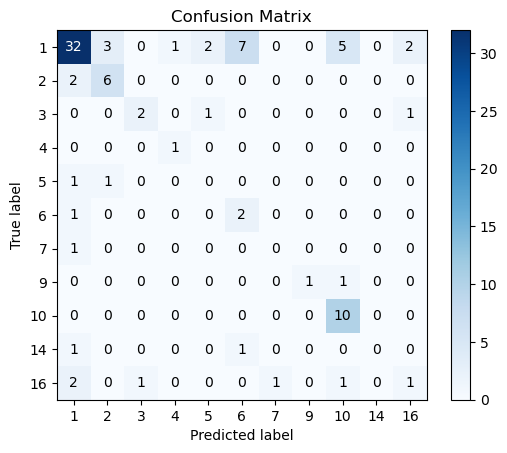

In [70]:
plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

## Neural Networks

In [71]:
# hyper parameter tuning using GridSearchCV for neural networks

from sklearn.model_selection import GridSearchCV

nnclassifier = MLPClassifier(max_iter = 1500, random_state=1)

parameters = {
    'hidden_layer_sizes': [(64,), (64, 64)],
    'activation': ['relu', 'tanh', 'logistic'],  # Added 'logistic' activation function
    'max_iter': [1000, 2000],  # Added more values for max_iter
    'alpha': [0.0001, 0.05],  # Added more values for alpha
    'learning_rate_init': [0.001, 0.01, 0.1, 0.5]  # Added more values for learning_rate_init
}

scoring = {'accuracy': make_scorer(accuracy_score),
           'recall': make_scorer(recall_score, average='weighted'),
           'f1_score': make_scorer(f1_score, average='weighted')}

optimized_model = GridSearchCV(nnclassifier, parameters, cv=5, n_jobs=8, scoring=scoring, refit='accuracy', return_train_score=True)
optimized_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1500, random_state=1),
             n_jobs=8,
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(64,), (64, 64)],
                         'learning_rate_init': [0.001, 0.01, 0.1, 0.5],
                         'max_iter': [1000, 2000]},
             refit='accuracy', return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score, average=weighted),
                      'recall': make_scorer(recall_score, average=weighted)})

In [72]:
from tabulate import tabulate

# print(tabulate(optimized_model.cv_results_, headers=optimized_model.cv_results_.keys(), tablefmt='grid'))
results = pd.DataFrame(optimized_model.cv_results_)
results[['params','mean_test_accuracy', 'mean_test_recall', 'mean_test_f1_score']].sort_values(by=['mean_test_recall', 'mean_test_accuracy'],ascending=False).head()


,params,mean_test_accuracy,mean_test_recall,mean_test_f1_score
58,"{'activation': 'tanh', 'alpha': 0.05, 'hidden_...",0.667656,0.667656,0.647084
59,"{'activation': 'tanh', 'alpha': 0.05, 'hidden_...",0.667656,0.667656,0.647084
26,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.656393,0.656393,0.630215
27,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.656393,0.656393,0.630215
10,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.645396,0.645396,0.615963


In [73]:
optimized_model.best_params_

{'activation': 'tanh',
 'alpha': 0.05,
 'hidden_layer_sizes': (64, 64),
 'learning_rate_init': 0.01,
 'max_iter': 1000}

In [74]:
# Applying the tuned hyper parameters
nnclassifier_tuned = MLPClassifier()
nnclassifier.fit(X_train, y_train)
y_pred = nnclassifier.predict(X_test)
nn_tuned_accuracy = accuracy_score(y_test, y_pred)
nn_tuned_recall = recall_score(y_test, y_pred, average='weighted')
nn_tuned_precision = precision_score(y_test, y_pred, average='weighted')
nn_f1_score = f1_score(y_test, y_pred, average='weighted')


result_tuned = result_tuned.append(pd.Series({'Model':'Neural Networks',
                                              'Accuracy':nn_tuned_accuracy,
                                              'Recall':nn_tuned_recall, 
                                              'Precision': nn_tuned_precision,
                                              'F-1 Score': nn_f1_score}),
                                              ignore_index=True)

              precision    recall  f1-score   support

           1       0.76      0.87      0.81        52
           2       1.00      0.75      0.86         8
           3       1.00      0.50      0.67         4
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         2
           6       0.40      0.67      0.50         3
           7       0.00      0.00      0.00         1
           9       1.00      0.50      0.67         2
          10       0.67      0.80      0.73        10
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         0
          16       0.33      0.17      0.22         6

    accuracy                           0.73        91
   macro avg       0.51      0.44      0.45        91
weighted avg       0.71      0.73      0.70        91



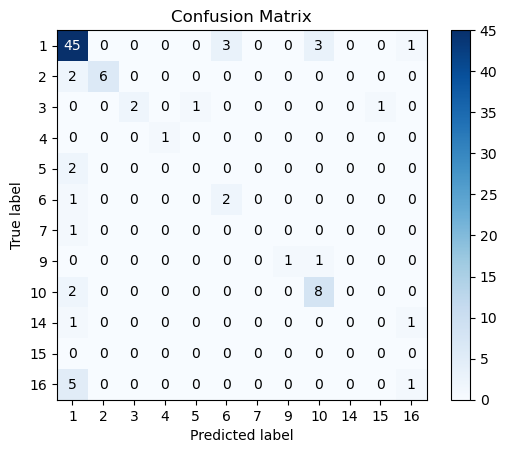

In [75]:
plot_confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Model Evaluation and Comparative Analysis

In [76]:
result_tuned

,Model,Accuracy,Recall,Precision,F-1 Score
0,Random Forest,0.692308,0.692308,0.588584,0.606584
1,SVM,0.604396,0.604396,0.654385,0.607950
2,Neural Networks,0.725275,0.725275,0.709095,0.704674


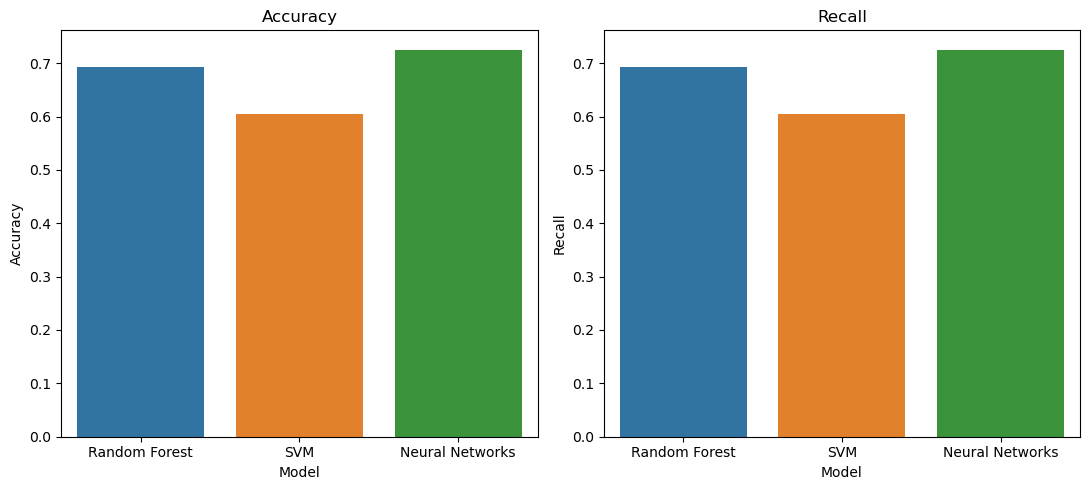

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5))

# Plot the first barplot on the left subplot
sns.barplot(data=result_tuned, x='Model', y='Accuracy', ax=axes[0])
axes[0].set_title('Accuracy')

# Plot the second barplot on the right subplot
sns.barplot(data=result_tuned, x='Model', y='Recall', ax=axes[1])
axes[1].set_title('Recall')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()